# Python ML Project
I would like to further extend the CIFAR data projects with more experients on DNNs.

In [80]:
# Import necessary libraries and data files

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np

# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Define a function to show the min and max of an arry
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())

# Define a function to plot an image
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

# Variables
img_rows, img_cols = 32, 32
num_classes = 10

# Input Shape
input_shape = (img_rows, img_cols, 3)

In [82]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()

label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

print(train_images.shape)
print(test_images.shape)



(50000, 32, 32, 3)
(10000, 32, 32, 3)


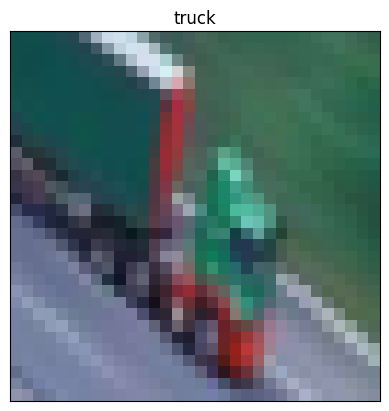

min and max value in image:  8 243


In [83]:
# Plot the 50th image
plot_image(train_images, 50, train_labels_backup)
show_min_max(train_images, 50)

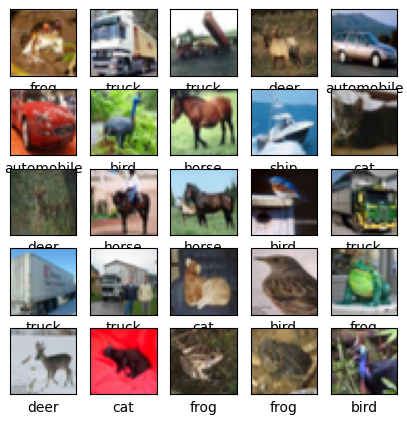

In [130]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(train_images[i]))
    plt.xlabel(str(label_names[train_labels_backup[i]]))
plt.show()

In [56]:
# Data Cleaning
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

## CNN (Convoluntional Neural Networks)

In [50]:
# Model specification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Epochs
epochs = 15
batch_size = 64
model = Sequential()

# Convolutional Layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# Batch Normalization
model.add(BatchNormalization())

# Adding More Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

# Final Stage of Layers
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

# Output Layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)       

In [51]:
# Compile and train the model
# This takes about three to four hours!
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)
scores = model.evaluate(test_images, test_labels,verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/15
782/782 [==============================] - 378s 481ms/step - loss: 1.5226 - accuracy: 0.4632 - val_loss: 1.4884 - val_accuracy: 0.5016
Epoch 2/15
782/782 [==============================] - 366s 469ms/step - loss: 1.0492 - accuracy: 0.6264 - val_loss: 1.0314 - val_accuracy: 0.6398
Epoch 3/15
782/782 [==============================] - 367s 469ms/step - loss: 0.8663 - accuracy: 0.6926 - val_loss: 0.8673 - val_accuracy: 0.6992
Epoch 4/15
782/782 [==============================] - 370s 473ms/step - loss: 0.7692 - accuracy: 0.7285 - val_loss: 0.7717 - val_accuracy: 0.7333
Epoch 5/15
782/782 [==============================] - 377s 482ms/step - loss: 0.6998 - accuracy: 0.7532 - val_loss: 0.8978 - val_accuracy: 0.6980
Epoch 6/15
782/782 [==============================] - 370s 474ms/step - loss: 0.6406 - accuracy: 0.7751 - val_loss: 0.7594 - val_accuracy: 0.7427
Epoch 7/15
782/782 [==============================] - 375s 479ms/step - loss: 0.5962 - accuracy: 0.7892 - val_loss: 0.7500 -

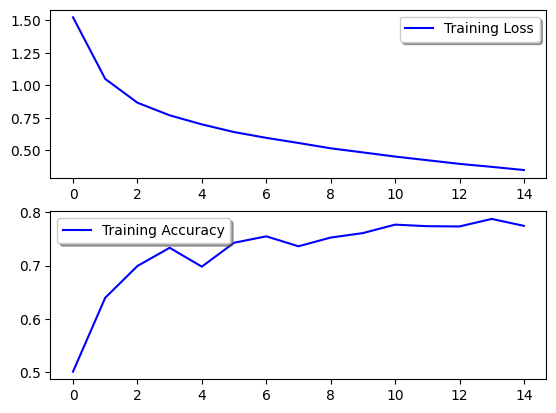

In [73]:
# Loss and accuracy curves (training data)
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['val_accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [122]:
# Confusion matrix
# One-hot encoding
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 16s 52ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

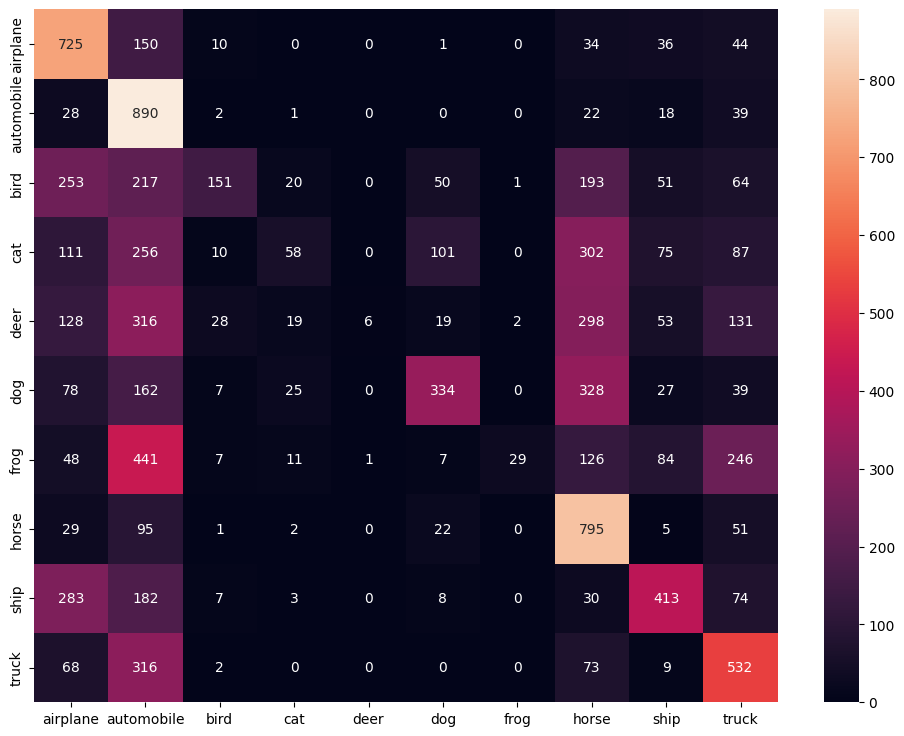

In [123]:
# Plot the confusion matrix
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=label_names, yticklabels=label_names)

In [96]:
# Predicting the first three test images
import numpy as np
X_new = test_images[:3]
y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=-1)

1/1 [==============================] - 0s 383ms/step


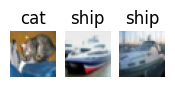

In [125]:
# Plot your model predictions for the first three images
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.squeeze(test_images[index]))
    plt.axis('off')
    plt.title(label_names[test_labels_backup[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()